# Breast Cancer Prediction

## Dataset Plotting
1. Read the dataset
2. Drop duplicates
3. Drop null values consisting of corresponding rows/columns
4. Replace null values with mean/median/mode
5. Scatter plot with and without hue
6. KDE plot with and without hue
7. Histogram with and without hue
8. Boxplot of all the features
9. Detect outliers with boxplot and IQR of all the features

10. Swarm and strip plot 

### load libraries

In [1]:
import numpy as np
import pandas as pd

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

### 01. Read the dataset

In [2]:
# Read the file "data.csv" and print the contents.
data = pd.read_csv('Breast_Cancer.csv', index_col=False,)
data.head(2)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive


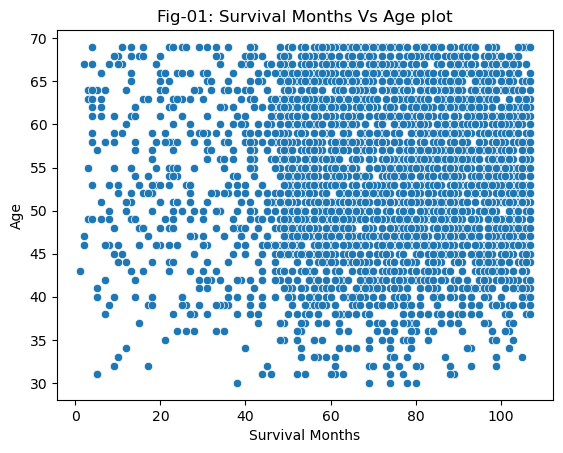

In [3]:
plt.title('Fig-01: Survival Months Vs Age plot')
sns.scatterplot(x = 'Survival Months', y = 'Age', data = data,);

In [4]:
data.shape

(4024, 16)

In [5]:
# Review data types with "info()".
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
#check for missing variables
data.isnull().any()

Age                       False
Race                      False
Marital Status            False
T Stage                   False
N Stage                   False
6th Stage                 False
differentiate             False
Grade                     False
A Stage                   False
Tumor Size                False
Estrogen Status           False
Progesterone Status       False
Regional Node Examined    False
Reginol Node Positive     False
Survival Months           False
Status                    False
dtype: bool

In [7]:
data.drop_duplicates()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [8]:
#basic descriptive statistics
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [9]:
# list of colmuns
print(data.columns.tolist())

['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


In [10]:
data.Race.unique()

array(['White', 'Black', 'Other'], dtype=object)

In [11]:
data.differentiate.unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [12]:
data.Grade.unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [13]:
data.Status.unique()

array(['Alive', 'Dead'], dtype=object)

### 02. Drop duplicates

In [14]:
data.drop_duplicates()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


### 03. Drop null values consisting of corresponding rows/columns
### 04. Replace null values with mean/median/mode

In [15]:
#check for missing variables
data.isnull().any()

Age                       False
Race                      False
Marital Status            False
T Stage                   False
N Stage                   False
6th Stage                 False
differentiate             False
Grade                     False
A Stage                   False
Tumor Size                False
Estrogen Status           False
Progesterone Status       False
Regional Node Examined    False
Reginol Node Positive     False
Survival Months           False
Status                    False
dtype: bool

### 05. Scatter plot with and without hue

In [16]:
sns.set(style="whitegrid")

<AxesSubplot:xlabel='Tumor Size', ylabel='Age'>

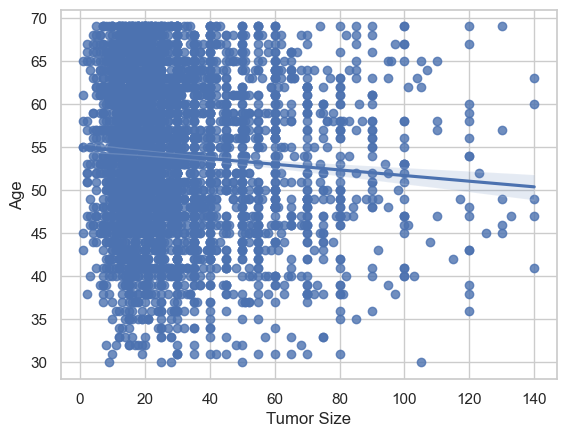

In [17]:
# Scatter plot of Survival Months vs Age with default arguments
sns.regplot(x=data['Tumor Size'], y=data['Age'])

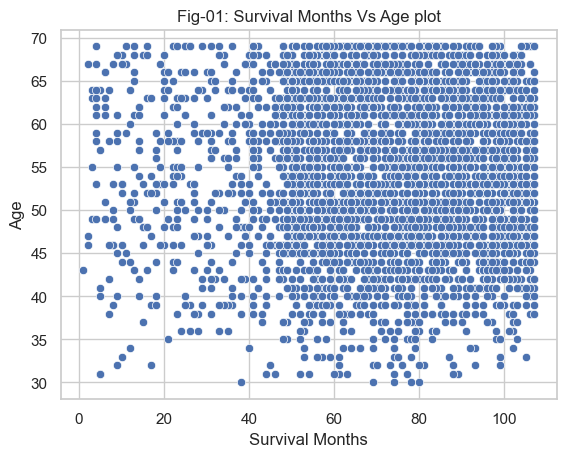

In [18]:
plt.title('Fig-01: Survival Months Vs Age plot')
sns.scatterplot(x = 'Survival Months', y = 'Age', data = data,);

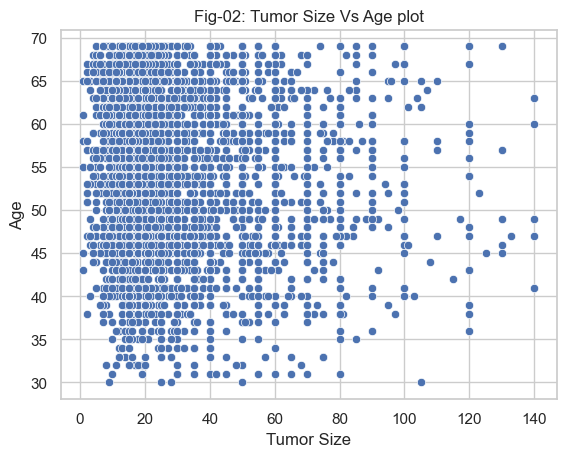

In [19]:
plt.title('Fig-02: Tumor Size Vs Age plot')
sns.scatterplot(x = 'Tumor Size', y = 'Age', data = data);

<AxesSubplot:title={'center':'Fig-03: Tumor Size Vs Age with Status as hue plot'}, xlabel='Tumor Size', ylabel='Age'>

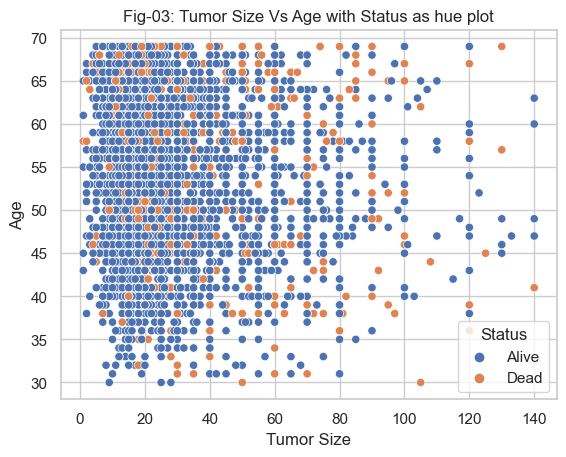

In [20]:
plt.title('Fig-03: Tumor Size Vs Age with Status as hue plot')
sns.scatterplot(x = 'Tumor Size',y = 'Age',  data = data, hue= 'Status')

<AxesSubplot:title={'center':'Fig-04: Regional Node Examined Vs Survival Months with Status as hue plot'}, xlabel='Survival Months', ylabel='Regional Node Examined'>

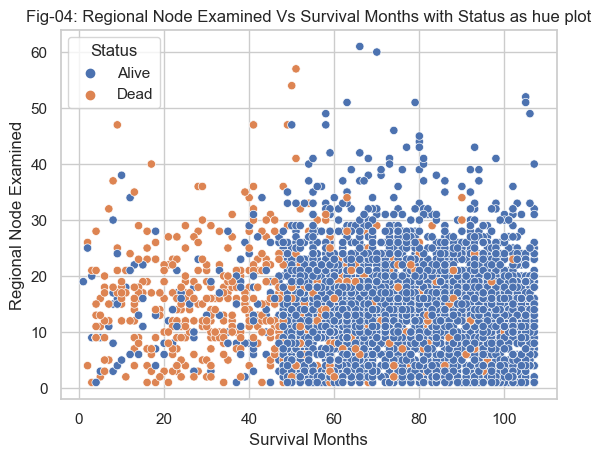

In [21]:
plt.title('Fig-04: Regional Node Examined Vs Survival Months with Status as hue plot')
sns.scatterplot(y = 'Regional Node Examined', x = 'Survival Months', data = data,hue = 'Status')

### KDE plot with and without hue

<AxesSubplot:title={'center':'Fig-04: Regional Node Examined Vs Survival Months with Status as hue plot'}, xlabel='Regional Node Examined', ylabel='Density'>

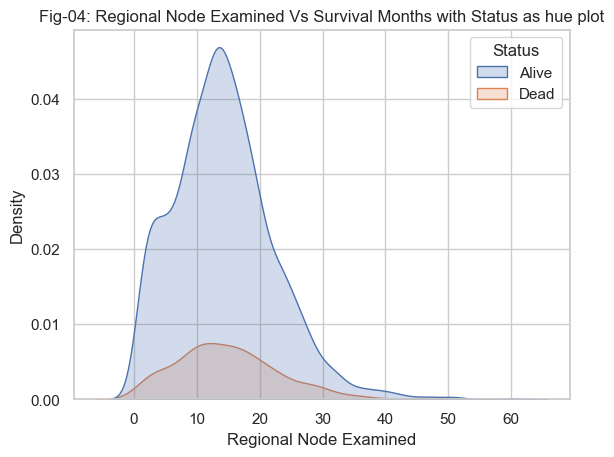

In [22]:
plt.title('Fig-04: Regional Node Examined Vs Survival Months with Status as hue plot')
sns.kdeplot(x = 'Regional Node Examined',  data = data,hue = 'Status', shade= True)

<AxesSubplot:title={'center':'Fig-04: Regional Node Examined Vs Survival Months with Status as hue plot'}, xlabel='Age', ylabel='Density'>

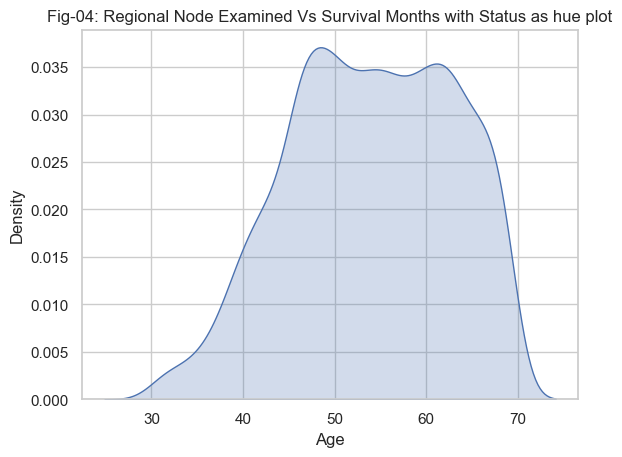

In [23]:
plt.title('Fig-04: Regional Node Examined Vs Survival Months with Status as hue plot')
sns.kdeplot(x = 'Age', data = data, shade = True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

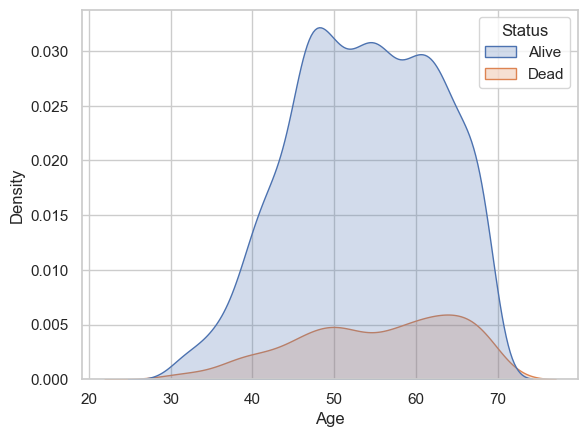

In [24]:
sns.kdeplot(x = 'Age', data = data, shade = True, hue = 'Status')

<AxesSubplot:xlabel='Tumor Size', ylabel='Density'>

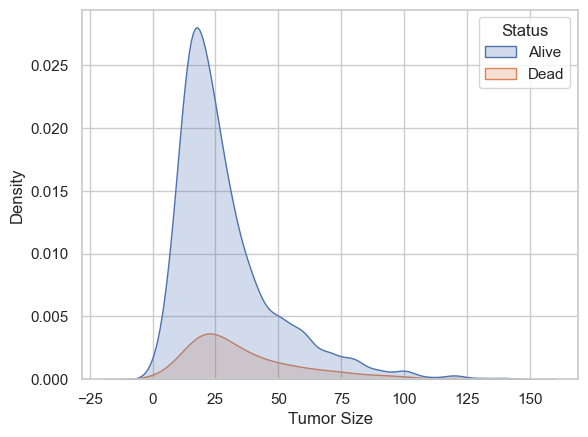

In [25]:
sns.kdeplot(x = 'Tumor Size', data = data,hue = 'Status' ,shade = True)

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

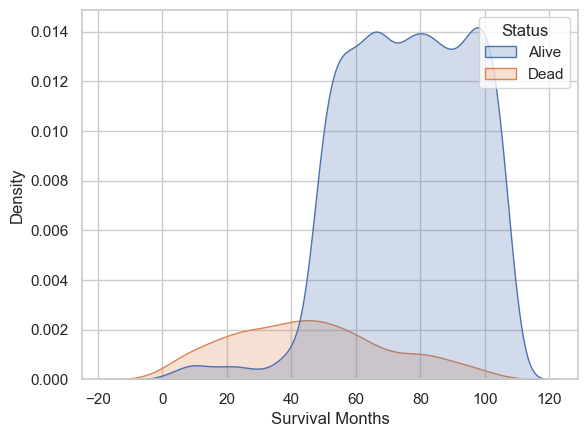

In [26]:
sns.kdeplot(x = 'Survival Months', data = data,hue = 'Status' ,shade = True)

<AxesSubplot:xlabel='Reginol Node Positive', ylabel='Density'>

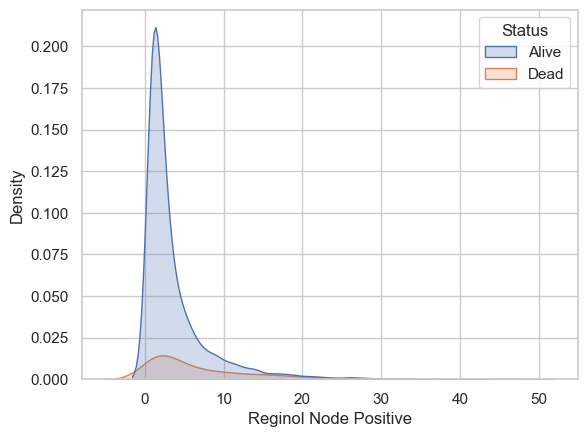

In [27]:
sns.kdeplot(x = 'Reginol Node Positive', data = data,hue = 'Status' ,shade = True)

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

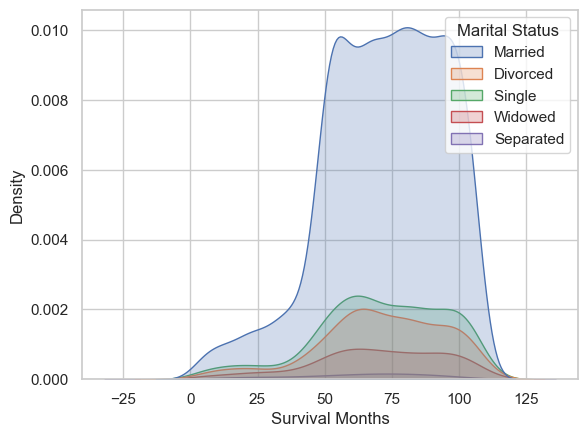

In [28]:
sns.kdeplot(x = 'Survival Months', data = data,hue = 'Marital Status' ,shade = True)

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

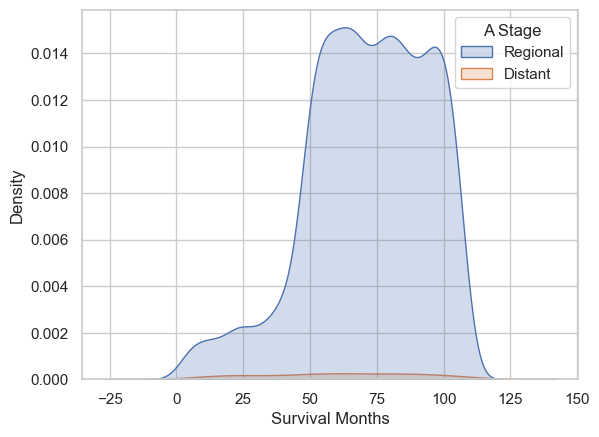

In [29]:
sns.kdeplot(x = 'Survival Months', data = data,hue = 'A Stage' ,shade = True)

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

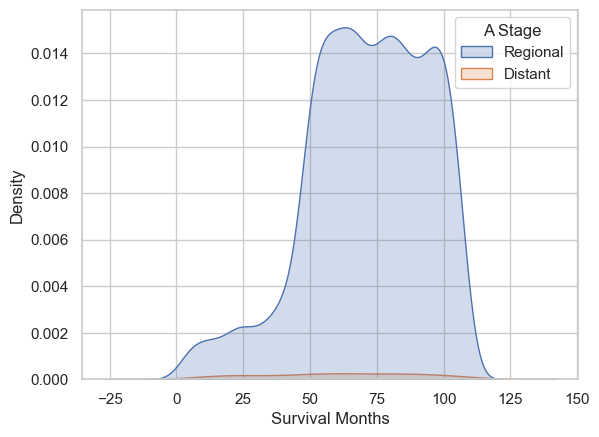

In [30]:
sns.kdeplot(x = 'Survival Months', data = data,hue = 'A Stage' ,shade = True)

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

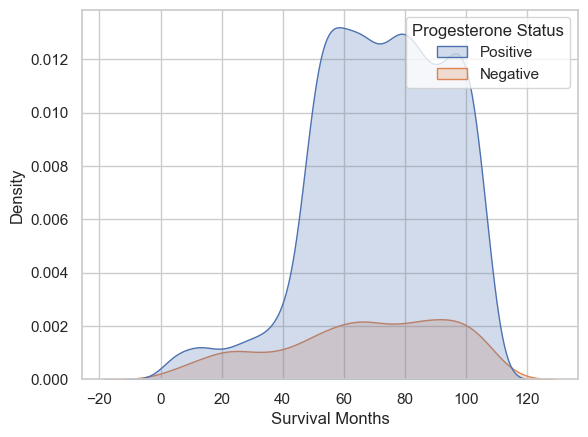

In [31]:
sns.kdeplot(x = 'Survival Months', data = data,hue = 'Progesterone Status' ,shade = True)

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

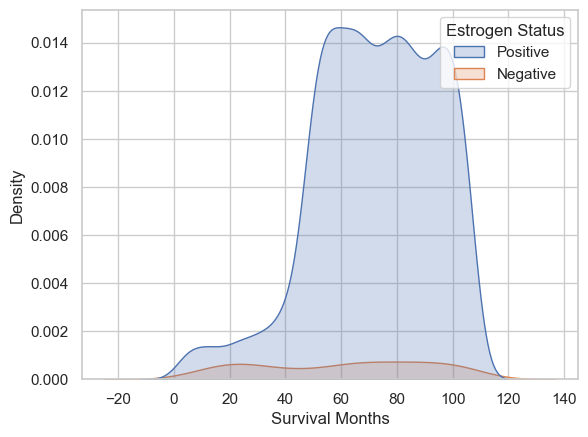

In [32]:
sns.kdeplot(x = 'Survival Months', data = data,hue = 'Estrogen Status' ,shade = True)

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

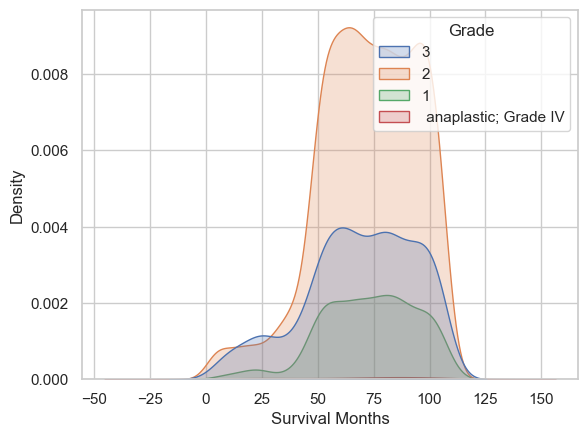

In [33]:
sns.kdeplot(x = 'Survival Months', data = data,hue = 'Grade' ,shade = True)

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

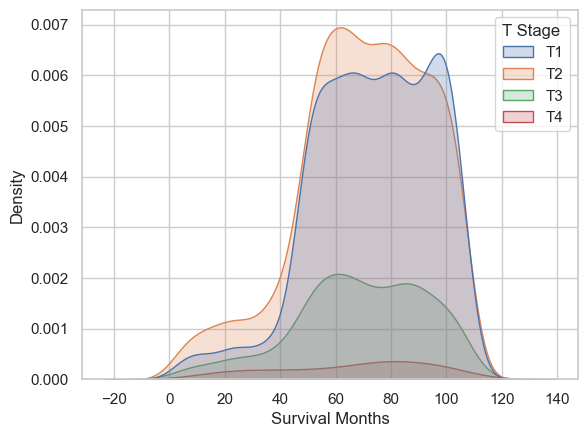

In [34]:
sns.kdeplot(x = 'Survival Months', data = data,hue = 'T Stage ' ,shade = True)

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

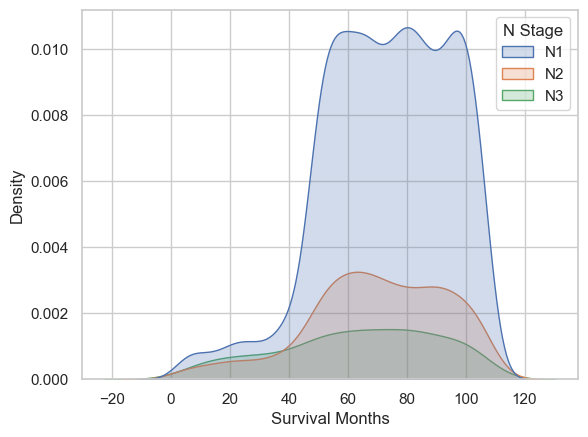

In [35]:
sns.kdeplot(x = 'Survival Months', data = data,hue = 'N Stage' ,shade = True)

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

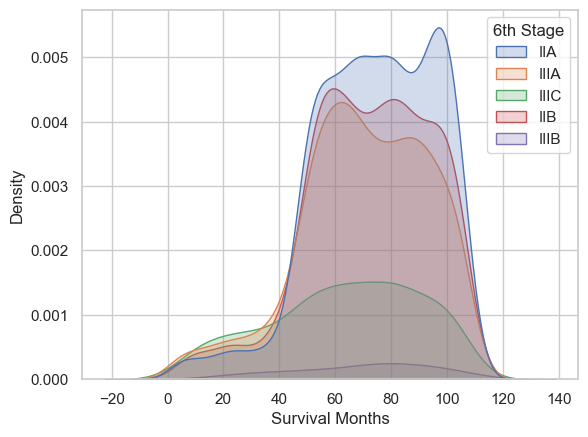

In [36]:
sns.kdeplot(x = 'Survival Months', data = data,hue = '6th Stage' ,shade = True)

### Histogram with and without hue

<AxesSubplot:xlabel='Tumor Size', ylabel='Count'>

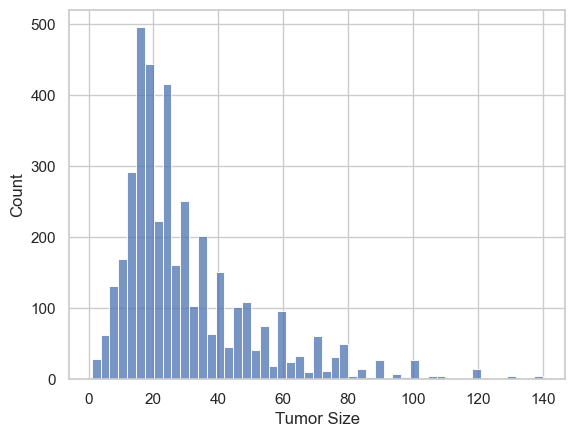

In [37]:
# Histogram of Age with default kernel density estimate 
sns.histplot(x = 'Tumor Size', data = data)

<AxesSubplot:xlabel='Tumor Size', ylabel='Count'>

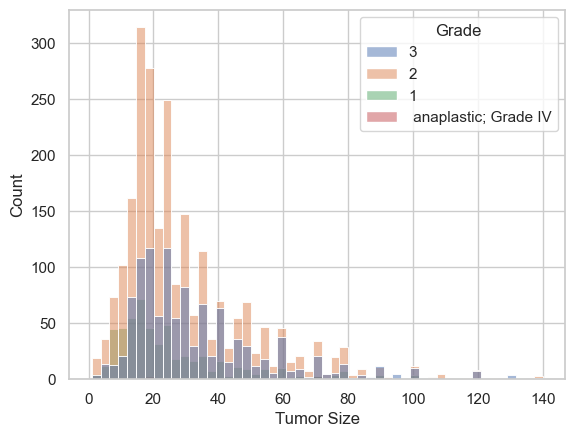

In [38]:
# Histogram of Age with default kernel density estimate 
sns.histplot(x = 'Tumor Size', data = data, hue = 'Grade')

<AxesSubplot:xlabel='Age', ylabel='Count'>

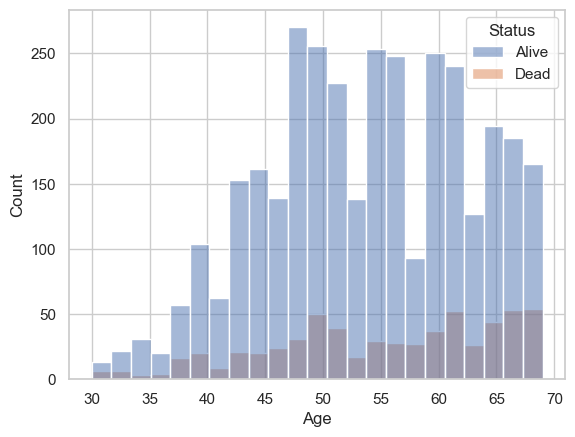

In [39]:
# Histogram with fixed no. of bins
sns.histplot(x = 'Age', data = data, hue = 'Status')

### Boxplot of all the features

<AxesSubplot:xlabel='Age'>

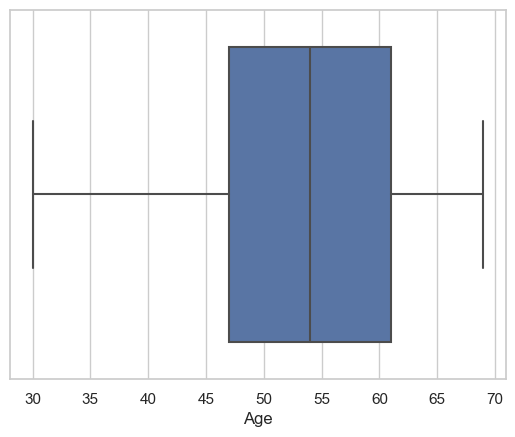

In [40]:
sns.boxplot(x=data["Age"])

<AxesSubplot:xlabel='Tumor Size'>

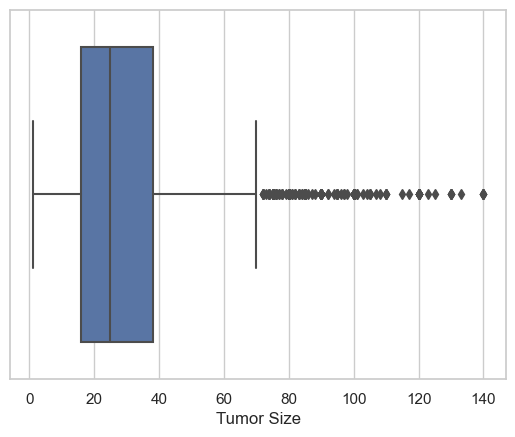

In [41]:
sns.boxplot(x=data["Tumor Size"])

<AxesSubplot:xlabel='Regional Node Examined'>

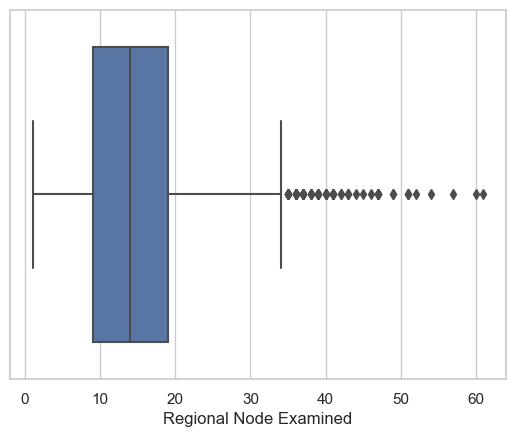

In [42]:
sns.boxplot(x=data["Regional Node Examined"])

<AxesSubplot:xlabel='Reginol Node Positive'>

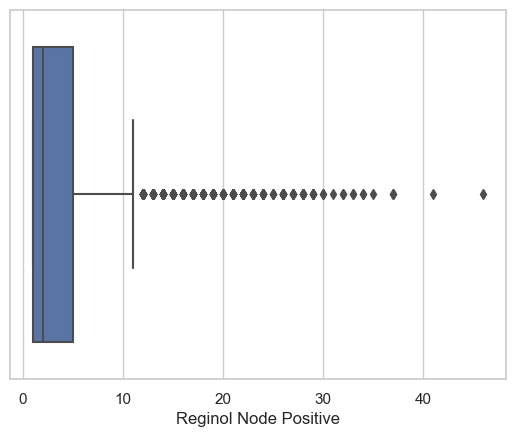

In [43]:
sns.boxplot(x=data["Reginol Node Positive"])

<AxesSubplot:xlabel='Survival Months'>

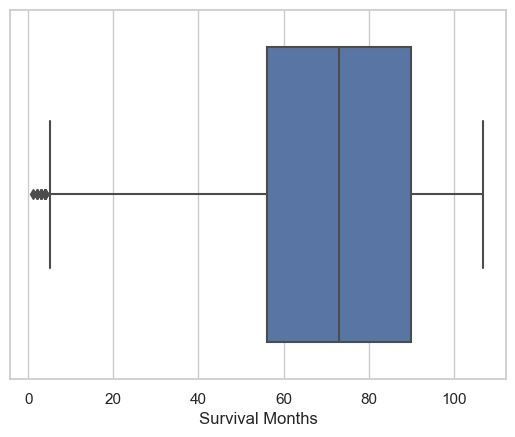

In [44]:
sns.boxplot(x=data["Survival Months"])

<AxesSubplot:xlabel='N Stage', ylabel='Tumor Size'>

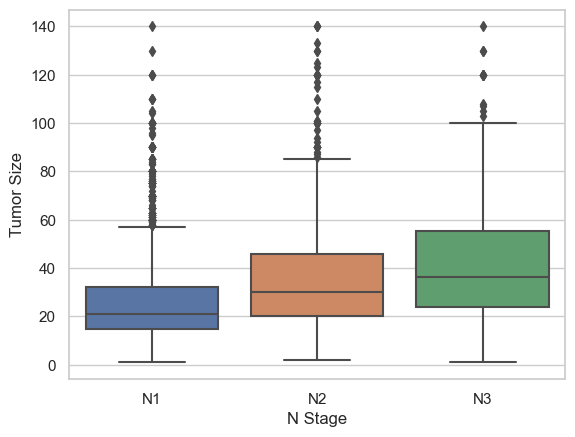

In [45]:
sns.boxplot(x= 'N Stage', y = 'Tumor Size', data = data)

<AxesSubplot:xlabel='6th Stage', ylabel='Tumor Size'>

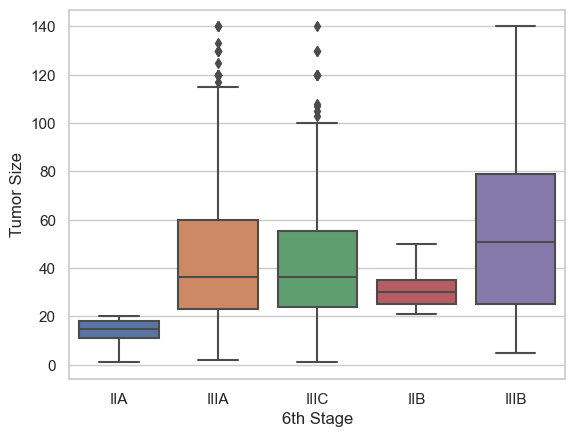

In [46]:
sns.boxplot(x= '6th Stage', y = 'Tumor Size', data = data)

<AxesSubplot:xlabel='differentiate', ylabel='Survival Months'>

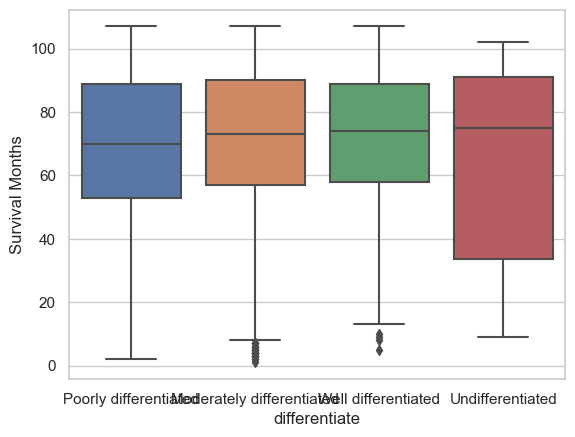

In [47]:
sns.boxplot(x= 'differentiate', y = 'Survival Months', data = data)

<AxesSubplot:xlabel='Grade', ylabel='Survival Months'>

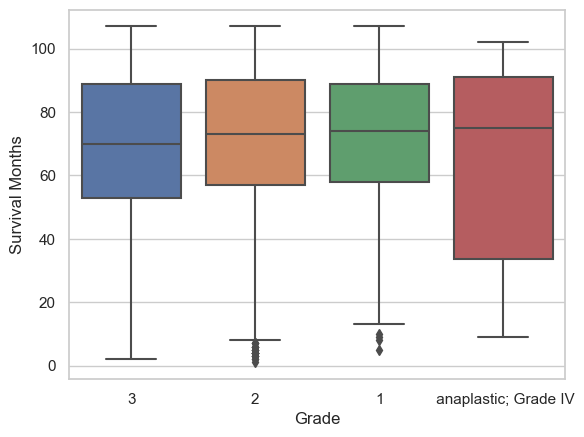

In [48]:
sns.boxplot(x= 'Grade', y = 'Survival Months', data = data)

<AxesSubplot:xlabel='Estrogen Status', ylabel='Survival Months'>

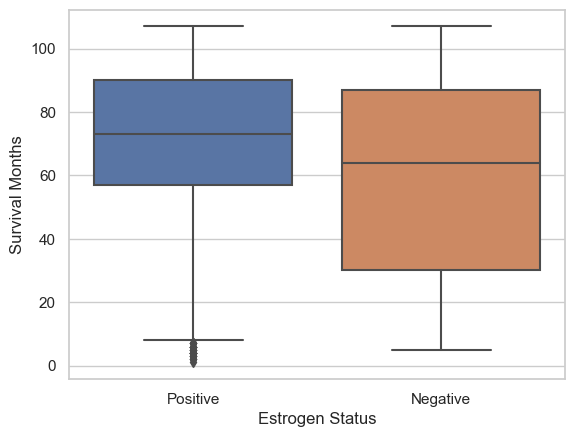

In [49]:
sns.boxplot(x= 'Estrogen Status', y = 'Survival Months', data = data)

<AxesSubplot:xlabel='Progesterone Status', ylabel='Survival Months'>

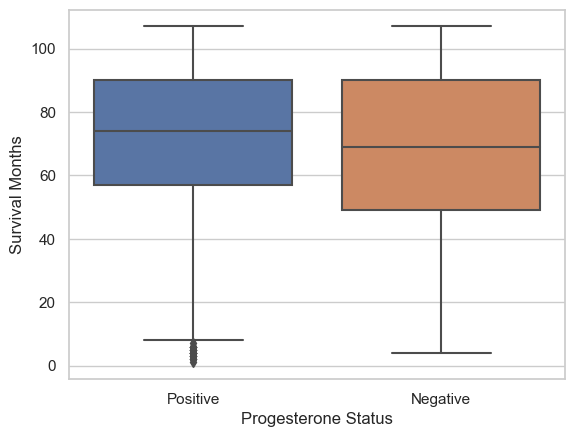

In [50]:
sns.boxplot(x= 'Progesterone Status', y = 'Survival Months', data = data)

<AxesSubplot:xlabel='Status', ylabel='Survival Months'>

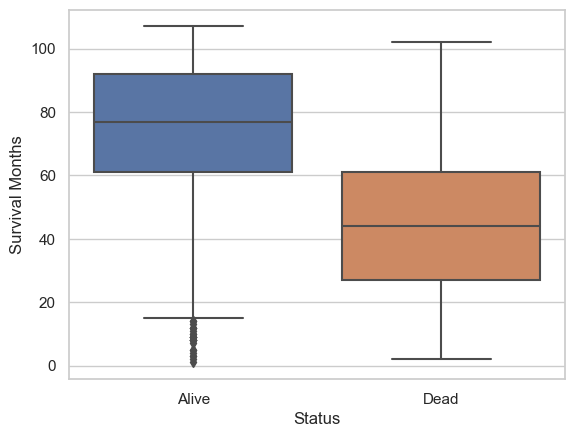

In [51]:
sns.boxplot(x= 'Status', y = 'Survival Months', data = data)

### Detect outliers with boxplot and IQR of all the features

In [52]:
# implementation of the Tukey's algorithm
# values that look different from the other values in the data
# Box plots are a visual method to identify outliers
def findOutliers(dataset):
    outliers = []
    Q2 = dataset.median()
    Q1 = dataset.describe()[4]
    Q3 = dataset.describe()[6]
    
    IQR = Q3 - Q1
    lf = Q1 - 1.5*IQR # lf = lower fence
    uf = Q3 + 1.5*IQR # Uf = Upper fence
    for x in dataset:
        if x < lf or x > uf:
            outliers.append(x)
    return outliers

In [53]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [54]:
findOutliers(data['Age'])

[]

su


<AxesSubplot:xlabel='Tumor Size'>

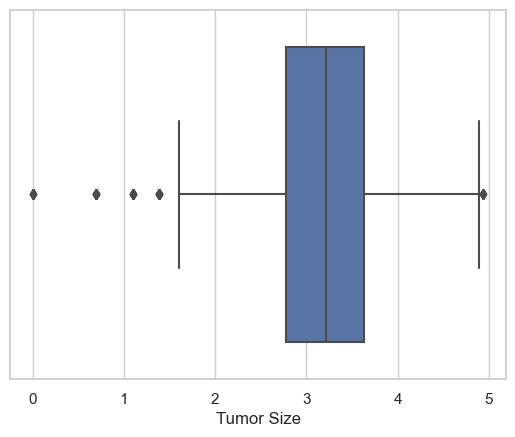

In [55]:
#sns.boxplot(x=data['Tumor Size'])
data_Tumor_size_log=np.log(data['Tumor Size'])
print('su')
data_Tumor_size_log.head()
sns.boxplot(x=data_Tumor_size_log)


In [56]:
len(findOutliers(data_Tumor_size_log))

47

In [57]:
findOutliers(data['Regional Node Examined'])

[49,
 42,
 41,
 39,
 46,
 40,
 39,
 51,
 44,
 38,
 47,
 40,
 54,
 39,
 36,
 38,
 36,
 38,
 61,
 41,
 37,
 36,
 36,
 35,
 40,
 47,
 43,
 39,
 49,
 35,
 37,
 41,
 36,
 52,
 41,
 37,
 41,
 35,
 45,
 36,
 35,
 35,
 35,
 43,
 57,
 37,
 36,
 43,
 39,
 47,
 35,
 36,
 37,
 35,
 35,
 47,
 40,
 41,
 37,
 47,
 35,
 37,
 51,
 51,
 42,
 38,
 47,
 40,
 36,
 60,
 37,
 39]

In [58]:
findOutliers(data['Reginol Node Positive'])

[18,
 12,
 14,
 22,
 17,
 23,
 12,
 23,
 20,
 16,
 13,
 16,
 24,
 16,
 14,
 17,
 14,
 13,
 13,
 12,
 12,
 17,
 27,
 13,
 21,
 26,
 15,
 17,
 28,
 15,
 14,
 14,
 17,
 23,
 12,
 14,
 13,
 13,
 12,
 17,
 12,
 13,
 14,
 13,
 17,
 19,
 24,
 19,
 13,
 12,
 28,
 20,
 17,
 14,
 28,
 24,
 29,
 22,
 31,
 13,
 26,
 15,
 15,
 46,
 19,
 22,
 16,
 27,
 21,
 14,
 17,
 15,
 22,
 13,
 18,
 16,
 20,
 14,
 33,
 18,
 15,
 14,
 22,
 12,
 23,
 29,
 19,
 27,
 22,
 20,
 15,
 16,
 19,
 37,
 22,
 16,
 28,
 22,
 18,
 17,
 17,
 20,
 15,
 17,
 16,
 14,
 22,
 24,
 15,
 30,
 37,
 12,
 27,
 22,
 26,
 18,
 20,
 13,
 35,
 22,
 16,
 12,
 15,
 12,
 16,
 25,
 14,
 17,
 13,
 24,
 15,
 20,
 16,
 13,
 17,
 19,
 16,
 19,
 13,
 22,
 12,
 12,
 19,
 14,
 15,
 13,
 14,
 16,
 29,
 21,
 17,
 17,
 29,
 13,
 15,
 13,
 25,
 21,
 18,
 17,
 21,
 12,
 12,
 19,
 16,
 26,
 16,
 18,
 23,
 17,
 13,
 15,
 12,
 14,
 14,
 12,
 29,
 27,
 22,
 19,
 14,
 12,
 18,
 15,
 12,
 16,
 32,
 14,
 14,
 41,
 15,
 12,
 12,
 16,
 12,
 16,
 15,
 12,
 18,
 17,


In [59]:
findOutliers(data['Survival Months'])

[3, 4, 3, 4, 1, 3, 4, 2, 4, 3, 4, 2, 4, 2, 4, 4, 4, 4]

<AxesSubplot:xlabel='Tumor Size'>

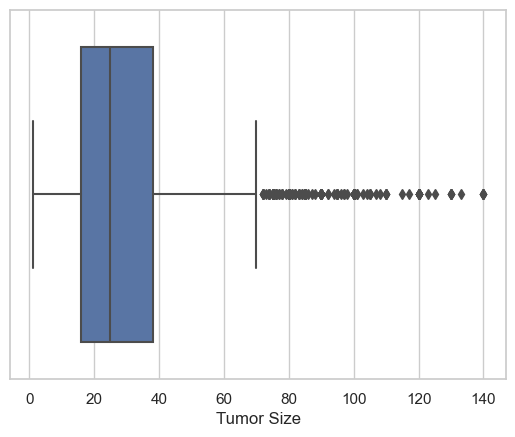

In [60]:
sns.boxplot(x = 'Tumor Size', data = data)

In [61]:
# findOutliers(data['Tumor Size'])

### Swarm and strip plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


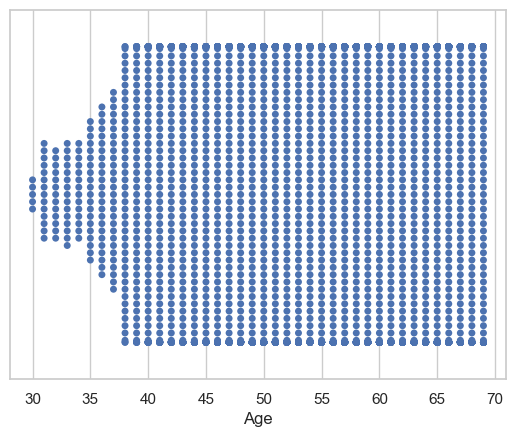

In [62]:
sns.swarmplot(x = 'Age', data = data);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.0% of the points

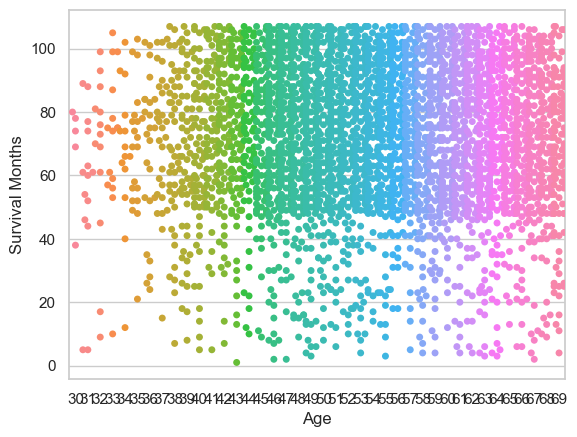

In [63]:
#plt.figure(figsize = (7,7))
sns.swarmplot(x = 'Age',y = 'Survival Months', data = data);

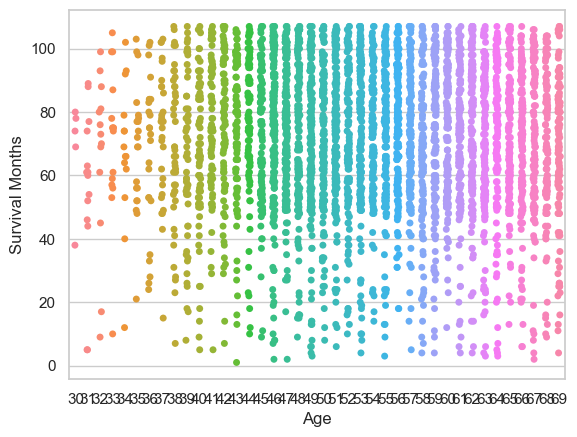

In [64]:
sns.stripplot(x = 'Age',y = 'Survival Months', data = data);

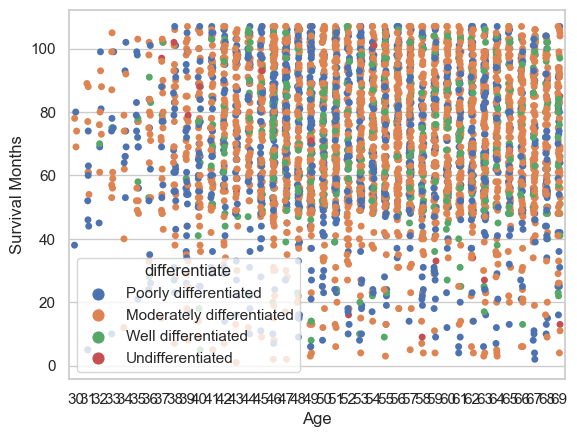

In [65]:
sns.stripplot(x = 'Age',y = 'Survival Months', hue = 'differentiate', data = data);

In [66]:
x = data.drop(['Status'], axis=1)

In [67]:
x

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72


In [68]:
y = data['Status']

In [69]:
y

0       Alive
1       Alive
2       Alive
3       Alive
4       Alive
        ...  
4019    Alive
4020    Alive
4021    Alive
4022    Alive
4023    Alive
Name: Status, Length: 4024, dtype: object

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state=1)

In [72]:
xtrain

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
1641,39,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,21,Positive,Positive,18,2,95
730,55,White,Divorced,T1,N2,IIIA,Poorly differentiated,3,Regional,20,Negative,Negative,17,4,19
616,38,White,Married,T3,N1,IIIA,Undifferentiated,anaplastic; Grade IV,Regional,70,Positive,Positive,10,1,102
812,59,White,Married,T1,N1,IIA,Well differentiated,1,Regional,10,Positive,Positive,5,1,89
3960,58,Other,Single,T2,N3,IIIC,Moderately differentiated,2,Regional,50,Positive,Negative,28,27,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,47,White,Married,T3,N3,IIIC,Moderately differentiated,2,Regional,80,Positive,Positive,21,11,52
1096,41,White,Married,T1,N2,IIIA,Moderately differentiated,2,Regional,16,Positive,Positive,9,9,51
3980,49,White,Divorced,T3,N1,IIIA,Poorly differentiated,3,Regional,65,Positive,Positive,22,1,76
235,68,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,14,Positive,Positive,26,1,72


In [73]:
ytrain

1641    Alive
730      Dead
616     Alive
812     Alive
3960     Dead
        ...  
3839    Alive
1096     Dead
3980    Alive
235     Alive
1061    Alive
Name: Status, Length: 3018, dtype: object

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
GNB = GaussianNB()

In [76]:
# GNB.fit(xtrain,ytrain)

In [77]:
from sklearn.naive_bayes import BernoulliNB

In [78]:
BNB = BernoulliNB()

In [81]:
BNB.fit(xtrain,ytrain)

ValueError: could not convert string to float: 'White'

### References & Links

In [80]:
# [5,7,8](https://github.com/svishakan/Machine-Learning/blob/f655e1e7efd49f969d8c33d4601fcdf63d28ea1a/Course%20Notebooks/Data_Visualization.py)
# ||
# [6](hasib_obayed)